In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Customer Data.csv')

In [3]:
data

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [4]:
data.describe()

,ID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [5]:
data['Income'].value_counts()

Medium    6
High      4
Low       4
Name: Income, dtype: int64

In [6]:
data.drop(['ID'],axis=1,inplace=True)

In [7]:
data

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


# Lets check what data speaks


In [18]:
data.describe()

,Age,Income,Gender,Marital Status,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


Yes    9
No     5
Name: Buys, dtype: int64


<AxesSubplot:xlabel='Buys', ylabel='count'>

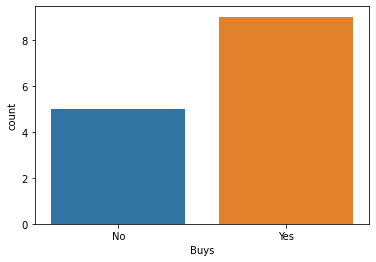

In [22]:
print(data['Buys'].value_counts())
sns.countplot(data=data,x='Buys')

### 9 out of 14 people purchases the Lipstic

In [38]:
print(data['Income'].value_counts())


Medium    6
High      4
Low       4
Name: Income, dtype: int64


In [39]:
print(data['Marital Status'].value_counts())

Single     7
Married    7
Name: Marital Status, dtype: int64


# product is bought by average earning people & both married and unmarried people prefer this product.Now lets see how this product is sold when we combine all the parameters

<AxesSubplot:xlabel='Income', ylabel='Buys'>

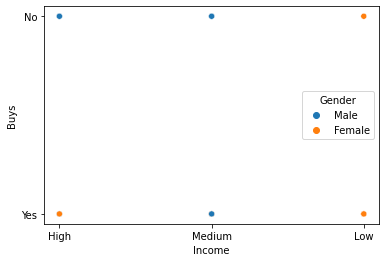

In [31]:
sns.scatterplot(x='Income',y='Buys',hue='Gender',data=data)

<AxesSubplot:xlabel='Gender', ylabel='Buys'>

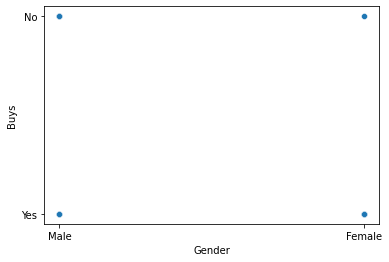

In [33]:
sns.scatterplot(x='Gender',y='Buys',data=data)

## Spliting data in dependent Variables

In [8]:
x=data.iloc[:,:-1]


   ## Here as we can see data is in categorical form we have to use Label Encoder to move to further predictions

In [9]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
x=x.apply(la.fit_transform)

In [10]:
print("Age with encodd value :",list( zip(data.iloc[:,0], x.iloc[:,0])))
print("\nIncome with encoded value :",list( zip(data.iloc[:,1], x.iloc[:,1])))
print("\nGender with encoded value :",list( zip(data.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus with encoded value :",list( zip(data.iloc[:,3], x.iloc[:,3])))

Age with encodd value : [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income with encoded value : [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Gender with encoded value : [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]

maritialStatus with encoded value : [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [12]:
y=data.iloc[:,-1].values

In [13]:
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

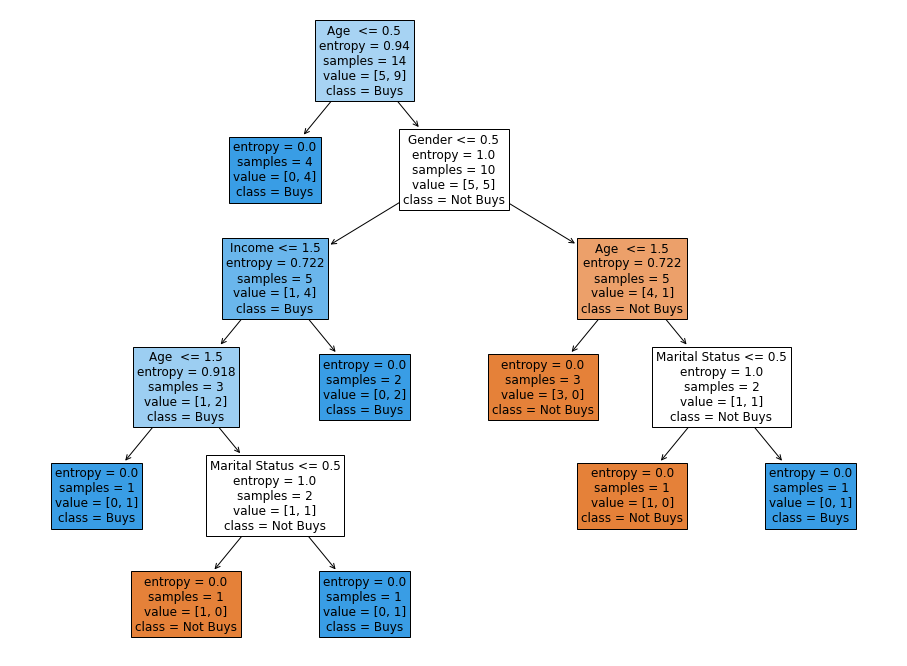

In [28]:
from sklearn.tree import plot_tree

fig=plt.figure(figsize=(16,12))
a= plot_tree(classifier,feature_names=data.columns,fontsize=12,filled=True,class_names=['Not Buys','Buys'])

# Q.)what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]? Write the concluding statement for the implemented application.


### for [Age < 21, Income = Low, Gender = Female, Marital Status = Married] array should be:;- [1,1,0,0] So Lets predict

In [29]:
classifier.predict([[1,1,0,0]])

array(['Yes'], dtype=object)

# Ans:- If person has age Age < 21 has low Income is a Female & Married she buys the Lipstick